<a href="https://colab.research.google.com/github/victorslls/37new/blob/main/C%C3%B3pia_de_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de Dados - Desafios de Data Science

In [ ]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Estilo de gráficos
sns.set(style="whitegrid")

Desafio Obrigatório - Análise de Dados de Vendas

In [ ]:
# Criar DataFrame com os dados fornecidos
dados_vendas = pd.DataFrame({
    "Região": ["Norte", "Norte", "Sul", "Sul", "Norte"],
    "Mês": ["Jan", "Fev", "Jan", "Fev", "Mar"],
    "Vendas": [1500, np.nan, 2200, 1800, 2000],
    "Despesas": [300, 250, np.nan, 400, 350]
})

# Salvar como Excel
excel_path = "vendas.xlsx"
dados_vendas.to_excel(excel_path, index=False)
excel_path  # Caminho salvo

'vendas.xlsx'

In [ ]:
# Carregar o arquivo
df = pd.read_excel(excel_path)

# Ver dados iniciais
print("Dados originais:")
print(df)

# Substituir NaN em 'Vendas' pela mediana e em 'Despesas' pela média
df["Vendas"].fillna(df["Vendas"].median(), inplace=True)
df["Despesas"].fillna(df["Despesas"].mean(), inplace=True)

# Agrupar por Região e Mês
agrupado = df.groupby(["Região", "Mês"]).agg({
    "Vendas": "sum",
    "Despesas": "mean"
}).reset_index()

# Mostrar resultado
print("\nDados agrupados:")
print(agrupado)

# Combinar colunas horizontalmente (hstack)
combinado = np.hstack([df["Vendas"].values.reshape(-1,1), df["Despesas"].values.reshape(-1,1)])
print("\nColunas combinadas (Vendas e Despesas):")
print(combinado)

# Sumário estatístico
print("\nSumário estatístico:")
print(df.describe())

#localizar o arquivo em excel
import os

print("Arquivo salvo em:", os.path.abspath(excel_path))

Dados originais:
  Região  Mês  Vendas  Despesas
0  Norte  Jan  1500.0     300.0
1  Norte  Fev     NaN     250.0
2    Sul  Jan  2200.0       NaN
3    Sul  Fev  1800.0     400.0
4  Norte  Mar  2000.0     350.0

Dados agrupados:
  Região  Mês  Vendas  Despesas
0  Norte  Fev  1900.0     250.0
1  Norte  Jan  1500.0     300.0
2  Norte  Mar  2000.0     350.0
3    Sul  Fev  1800.0     400.0
4    Sul  Jan  2200.0     325.0

Colunas combinadas (Vendas e Despesas):
[[1500.  300.]
 [1900.  250.]
 [2200.  325.]
 [1800.  400.]
 [2000.  350.]]

Sumário estatístico:
            Vendas    Despesas
count     5.000000    5.000000
mean   1880.000000  325.000000
std     258.843582   55.901699
min    1500.000000  250.000000
25%    1800.000000  300.000000
50%    1900.000000  325.000000
75%    2000.000000  350.000000
max    2200.000000  400.000000
Arquivo salvo em: /content/vendas.xlsx


<ipython-input-3-229510c788cd>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Vendas"].fillna(df["Vendas"].median(), inplace=True)
<ipython-input-3-229510c788cd>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

Desafio Eletivo 1 - Análise de Idades e Testes Estatísticos

In [ ]:
# Grupos de idade
grupo1 = np.array([12, 15, 18, 22, 22, 25, 28, 30, 35, 40])
grupo2 = np.array([15, 18, 21, 25, 25, 28, 31, 33, 38, 43])

# Estatísticas básicas
def resumo_estatistico(grupo):
    media = np.mean(grupo)
    variancia = np.var(grupo, ddof=1)
    iqr = stats.iqr(grupo)
    return media, variancia, iqr

media1, var1, iqr1 = resumo_estatistico(grupo1)
media2, var2, iqr2 = resumo_estatistico(grupo2)

print(f"Grupo 1 - Média: {media1:.2f}, Variância: {var1:.2f}, IQR: {iqr1:.2f}")
print(f"Grupo 2 - Média: {media2:.2f}, Variância: {var2:.2f}, IQR: {iqr2:.2f}")

# Teste de normalidade
sw1 = stats.shapiro(grupo1)
sw2 = stats.shapiro(grupo2)
print(f"Shapiro-Wilk Grupo 1: W={sw1.statistic:.4f}, p={sw1.pvalue:.4f}")
print(f"Shapiro-Wilk Grupo 2: W={sw2.statistic:.4f}, p={sw2.pvalue:.4f}")

Grupo 1 - Média: 24.70, Variância: 77.12, IQR: 10.50
Grupo 2 - Média: 27.70, Variância: 77.12, IQR: 10.50
Shapiro-Wilk Grupo 1: W=0.9794, p=0.9617
Shapiro-Wilk Grupo 2: W=0.9794, p=0.9617


Distribuição normal - realizando teste t de Student...
Teste t: estatística t=-0.7639, p=0.4548


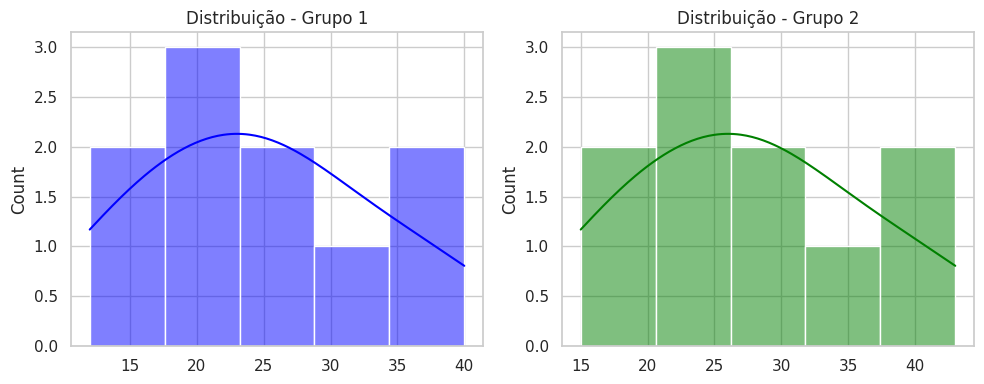

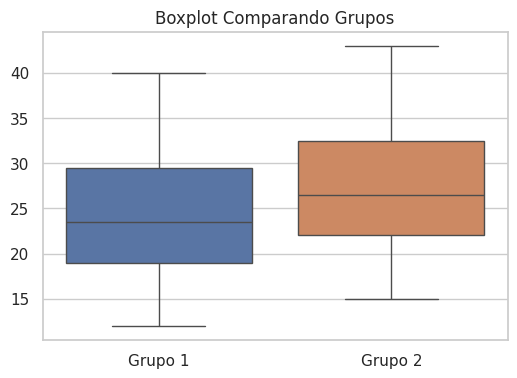

In [ ]:
# Escolha do teste
if sw1.pvalue > 0.05 and sw2.pvalue > 0.05:
    print("Distribuição normal - realizando teste t de Student...")
    t_result = stats.ttest_ind(grupo1, grupo2)
    print(f"Teste t: estatística t={t_result.statistic:.4f}, p={t_result.pvalue:.4f}")
else:
    print("Distribuição não-normal - realizando teste de Mann-Whitney...")
    mw_result = stats.mannwhitneyu(grupo1, grupo2, alternative='two-sided')
    print(f"Teste Mann-Whitney: estatística U={mw_result.statistic:.4f}, p={mw_result.pvalue:.4f}")

# Histogramas
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(grupo1, bins=5, kde=True, color='blue')
plt.title("Distribuição - Grupo 1")
plt.subplot(1,2,2)
sns.histplot(grupo2, bins=5, kde=True, color='green')
plt.title("Distribuição - Grupo 2")
plt.tight_layout()
plt.show()

# Boxplot comparando
plt.figure(figsize=(6,4))
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0,1], ["Grupo 1", "Grupo 2"])
plt.title("Boxplot Comparando Grupos")
plt.show()